In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2019-01-14 10:50:22,062 [3622] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel',  '--svhn',
       '--tensorboard', '--validation-size', "--out-dim"
       , 'deepstrom','dense', 
                     "--non-linear", "--non-linearity", "--num-epoch", "--seed",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)
    return df


In [4]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_svhn_grid_search/"
FILENAME = "gathered_results.csv"
df = build_df(DIRNAME, FILENAME)

In [5]:
df

--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
0             128        1.0    None           0.0100           False         128               True    svhn    linear  deepstrom  0.159290       23.533388  1781.526364          None  0.145132       9.659477      1547084400
1              64        0.5    0.05           0.0001            True         128              False    svhn       rbf  deepstrom  0.834244       13.198295  1134.556245          None  0.822817       5.924204      1547098603
2             256        1.0     0.5           0.0100            True         128               True    svhn       rbf  deepstrom  0.195970       15.116660  1149.363142          None  0.184395       6.496609      1547097930
3             256        1.0    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.924737       16.591773  1222.419324          None  0.914163       7.037160      1547117313
4              64        1.0     0.1           0.0001            True         128               True    svhn       rbf  deepstrom  0.823083       13.370557  1127.182760          None  0.820012       5.972538      1547092980
5              64        0.5    None           0.0010           False         128              False    svhn    linear  deepstrom  0.195774       13.199435  1125.068811          None  0.184195       5.901541      1547086954
6              64        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.937500       37.902838  3098.957658          None  0.927784      14.984854      1547065817
7             128        0.5    0.05           0.0010            True         128               True    svhn       rbf  deepstrom  0.195851        8.172392   700.271652          None  0.184295       4.228114      1547093853
8             128        1.0     0.5           0.0100            True         128              False    svhn       rbf  deepstrom  0.110722        8.889199   663.649309          None  0.115885       4.281602      1547102733
9             128        0.5     0.1           0.0001            True         128              False    svhn       rbf  deepstrom  0.896475        8.273289   656.204656          None  0.895833       4.048297      1547102316
10            128        0.5     0.5           0.0001           False         128               True    svhn       rbf  deepstrom  0.116803        8.421783   650.802052          None  0.113982       4.032381      1547108488
11            128        1.0     0.1           0.0100            True         128              False    svhn       rbf  deepstrom  0.061307        8.798925   672.496894          None  0.065805       4.205059      1547102733
12             64        0.5     0.1           0.0001            True         128               True    svhn       rbf  deepstrom  0.909290       35.555933  3043.671678          None  0.892829      14.340119      1547091832
13             64        1.0     0.5           0.0010           False         128              False    svhn       rbf  deepstrom  0.170797       20.893528  1465.075660          None  0.155649       8.098643      1547112950
14            256        1.0     0.5           0.0001            True         128               True    svhn       rbf  deepstrom  0.917737       16.776440  1229.914917          None  0.906050       7.093989      1547098297
15             64        1.0     0.5           0.0100            True         128              False    svhn       rbf  deepstrom  0.195774       39.317812  3178.016377          None  0.184195      16.110558      1547099016
16             64        1.0    0.01           0.0100           False         128               True    svhn       rbf  deepstrom  0.195774       23.100310  1570.352022          None  0.184195     

In [6]:
def get_sorted_acc_for_dataset(df_, name):
    df_dataset = df_[df_["dataset"] == name]
    df_dataset = df_dataset.sort_values(by="val_acc", ascending=False)
    return df_dataset

In [7]:
get_sorted_acc_for_dataset(df, "svhn")

--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
402            64        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.939155       39.352180  3139.458615          None  0.932592      15.723781      1547088087
128            64        0.5    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.944042       39.365745  3179.054490          None  0.931691      16.170454      1547112046
166            64        1.0    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.943311       35.993827  2980.253613          None  0.930288      14.462501      1547112988
395            64        1.0    0.01           0.0001           False         128              False    svhn       rbf  deepstrom  0.938578       35.987987  2980.403913          None  0.929587      14.466828      1547112988
227            64        1.0    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.938962       13.219491  1130.568430          None  0.929287       5.918825      1547076789
6              64        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.937500       37.902838  3098.957658          None  0.927784      14.984854      1547065817
392           128        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.934614        8.365435   659.294345          None  0.927584       4.015903      1547089281
200           128        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.934883       24.361339  1833.916209          None  0.927384      10.374600      1547072011
228            64        1.0    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.939771       35.676507  2980.266503          None  0.927083      14.319372      1547106899
261            64        0.5    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.940771       14.015179  1198.391861          None  0.926282       6.277118      1547106031
116           128        0.5    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.936692        8.639630   653.272355          None  0.925481       4.090088      1547108287
276           256        1.0     0.1           0.0001           False         128              False    svhn       rbf  deepstrom  0.930654        6.128070   478.673601          None  0.924880       3.374959      1547117591
75             64        0.5    0.01           0.0001           False         128               True    svhn       rbf  deepstrom  0.936615       13.905014  1196.477631          None  0.924179       6.276282      1547106031
303            64        1.0    0.01           0.0001           False         128               True    svhn       rbf  deepstrom  0.935999       35.853751  2980.696849          None  0.924179      14.395782      1547106899
73             64        0.5    0.01           0.0001           False         128              False    svhn       rbf  deepstrom  0.934729       39.408908  3172.920190          None  0.923878      16.190608      1547112046
212           128        1.0    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.936692        8.308598   652.234943          None  0.923578       3.983150      1547109659
332           128        0.5    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.930419        8.692597   655.025120          None  0.923077     

In [8]:
sorted_ = get_sorted_acc_for_dataset(df, "svhn")
for k in ["rbf", "linear", "chi2_cpd"]:
    sorted_k = sorted_[sorted_["kernel"] == k]
    print(k)
    display(sorted_k)

rbf


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
128            64        0.5    0.05           0.0001           False         128              False    svhn    rbf  deepstrom  0.944042       39.365745  3179.054490          None  0.931691      16.170454      1547112046
166            64        1.0    0.05           0.0001           False         128              False    svhn    rbf  deepstrom  0.943311       35.993827  2980.253613          None  0.930288      14.462501      1547112988
395            64        1.0    0.01           0.0001           False         128              False    svhn    rbf  deepstrom  0.938578       35.987987  2980.403913          None  0.929587      14.466828      1547112988
228            64        1.0    0.05           0.0001           False         128               True    svhn    rbf  deepstrom  0.939771       35.676507  2980.266503          None  0.927083      14.319372      1547106899
261            64        0.5    0.05           0.0001           False         128               True    svhn    rbf  deepstrom  0.940771       14.015179  1198.391861          None  0.926282       6.277118      1547106031
116           128        0.5    0.05           0.0001           False         128               True    svhn    rbf  deepstrom  0.936692        8.639630   653.272355          None  0.925481       4.090088      1547108287
276           256        1.0     0.1           0.0001           False         128              False    svhn    rbf  deepstrom  0.930654        6.128070   478.673601          None  0.924880       3.374959      1547117591
75             64        0.5    0.01           0.0001           False         128               True    svhn    rbf  deepstrom  0.936615       13.905014  1196.477631          None  0.924179       6.276282      1547106031
303            64        1.0    0.01           0.0001           False         128               True    svhn    rbf  deepstrom  0.935999       35.853751  2980.696849          None  0.924179      14.395782      1547106899
73             64        0.5    0.01           0.0001           False         128              False    svhn    rbf  deepstrom  0.934729       39.408908  3172.920190          None  0.923878      16.190608      1547112046
212           128        1.0    0.05           0.0001           False         128               True    svhn    rbf  deepstrom  0.936692        8.308598   652.234943          None  0.923578       3.983150      1547109659
332           128        0.5    0.05           0.0001           False         128              False    svhn    rbf  deepstrom  0.930419        8.692597   655.025120          None  0.923077       4.057216      1547114292
161           128        1.0    0.01           0.0001           False         128              False    svhn    rbf  deepstrom  0.931727        8.806375   672.783269          None  0.922376       4.327877      1547115700
239           128        1.0     0.5           0.0001            True         128               True    svhn    rbf  deepstrom  0.934075        8.801987   674.837657          None  0.921074       4.280019      1547096525
105           128        1.0    0.05           0.0001           False         128              False    svhn    rbf  deepstrom  0.931804        8.837971   671.794619          None  0.920172       4.360679      1547115700
317           128        1.0     0.1           0.0001           False         128              False    svhn    rbf  deepstrom  0.929611        8.269050   650.921717          None  0.918870       4.010248      1547115806
135           128        1.0    0.01           0.0001           False         128               True    svhn    rbf  deepstrom  0.930188        8.704289   653.113968          None  0.918570       4.119099      1547109659
154           128        0.

linear


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset  kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
64             64        1.0    None           0.0001            True         128              False    svhn  linear  deepstrom  0.925877       13.392945  1125.851499          None  0.919671       5.926992      1547076789
364           128        1.0    None           0.0001            True         128               True    svhn  linear  deepstrom  0.918180       24.258615  1796.917498          None  0.916066      10.360048      1547072011
101           128        1.0    None           0.0001            True         128              False    svhn  linear  deepstrom  0.931920       22.208067  1787.027970          None  0.915665       9.172711      1547080635
253           256        1.0    None           0.0001            True         128              False    svhn  linear  deepstrom  0.919903       16.672203  1213.941151          None  0.908754       7.052029      1547081857
293           256        1.0    None           0.0001            True         128               True    svhn  linear  deepstrom  0.921218       16.786028  1233.476887          None  0.908053       7.094884      1547074678
132           256        1.0    None           0.0001           False         128              False    svhn  linear  deepstrom  0.921720        5.932076   403.090008          None  0.907051       3.058119      1547090408
137            64        1.0    None           0.0001            True         128               True    svhn  linear  deepstrom  0.921221       36.662952  3054.997502          None  0.906050      14.757226      1547065817
338           128        1.0    None           0.0001           False         128              False    svhn  linear  deepstrom  0.920951        8.314801   650.001549          None  0.902244       4.057511      1547089281
103            64        1.0    None           0.0001           False         128              False    svhn  linear  deepstrom  0.894858       38.769543  3106.132003          None  0.890024      15.477296      1547088087
210           128        0.5    None           0.0001            True         128               True    svhn  linear  deepstrom  0.895821       22.108988  1738.457815          None  0.882612       9.135784      1547070733
333           256        0.5    None           0.0001            True         128               True    svhn  linear  deepstrom  0.888885       15.124828  1136.629617          None  0.877704       6.522141      1547073332
112           128        0.5    None           0.0001           False         128              False    svhn  linear  deepstrom  0.866456       23.842943  1834.070502          None  0.860877       9.806379      1547088193
26             64        0.5    None           0.0001            True         128               True    svhn  linear  deepstrom  0.864917       38.302287  3077.725085          None  0.858574      15.333770      1547065450
294           256        0.5    None           0.0001            True         128              False    svhn  linear  deepstrom  0.860342        5.985570   396.857044          None  0.856671       3.104115      1547081547
20            128        0.5    None           0.0001            True         128              False    svhn  linear  deepstrom  0.746883        8.177992   655.258562          None  0.746294       3.911445      1547079115
107            64        0.5    None           0.0001            True         128              False    svhn  linear  deepstrom  0.693927       35.575831  3029.211816          None  0.690705      14.555534      1547075713
419           256        1.0    None           0.0010            True         128               True    svhn  linear  deepstrom  0.560450       15.165731  1153.357476          None  0.582031       6.540750      1547074523
394      

chi2_cpd


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
402            64        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.939155       39.352180  3139.458615          None  0.932592      15.723781      1547088087
227            64        1.0    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.938962       13.219491  1130.568430          None  0.929287       5.918825      1547076789
6              64        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.937500       37.902838  3098.957658          None  0.927784      14.984854      1547065817
392           128        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.934614        8.365435   659.294345          None  0.927584       4.015903      1547089281
200           128        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.934883       24.361339  1833.916209          None  0.927384      10.374600      1547072011
347           128        1.0    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.930573       22.487734  1827.726744          None  0.920974       9.324217      1547080635
50            256        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.932859        5.988753   411.366231          None  0.919972       3.014511      1547090408
315            64        0.5    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.929803       36.979988  3073.120636          None  0.919471      14.705605      1547075713
428            64        0.5    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.929803       39.077703  3130.897321          None  0.916366      15.625675      1547065450
124            64        1.0    None           0.0010            True         128              False    svhn  chi2_cpd  deepstrom  0.927455       36.054245  2980.479324          None  0.913161      14.493011      1547076721
182           128        0.5    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.927648       22.449169  1806.515187          None  0.913061       9.285370      1547070733
231           256        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.925356       17.341598  1261.225074          None  0.910958       7.303809      1547074678
147           256        1.0    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.923963       17.272789  1253.995747          None  0.910256       7.294198      1547081857
260           256        1.0    None           0.0010            True         128               True    svhn  chi2_cpd  deepstrom  0.915068       15.659488  1186.807433          None  0.905849       6.751133      1547074523
187           128        0.5    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.912485        8.469747   656.776249          None  0.904848       3.959217      1547079115
282           256        0.5    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.909769       15.728722  1171.181292          None  0.903145       6.725869      1547073332
267           256        0.5    None           0.0010            True         128              False    svhn  chi2_cpd  deepstrom  0.880724       17.248833  1256.349368          None  0.878005     

In [7]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
nys_size = set(df["--nys-size"].values)
gamma_values = set(df["--gamma"].values)
gamma_values.remove("None")
datasets = set(df["dataset"].values)

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Datasets: {}".format(datasets))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))

2019-01-10 18:36:52,272 [28181] DEBUG    root: Nystrom possible sizes are: {128}
2019-01-10 18:36:52,274 [28181] DEBUG    root: Datasets: {'svhn'}
2019-01-10 18:36:52,277 [28181] DEBUG    root: Kernel functions are: {'linear', 'rbf', 'chi2_cpd'}
2019-01-10 18:36:52,278 [28181] DEBUG    root: Compared network types are: {'deepstrom'}


In [10]:
nb = 5
data = "svhn"
map_k_arg = {
    "rbf": "-R",
    "chi2_cpd": "-C",
    "linear": "-L"
}
for k_name in kernel_names:
    df_k = df[df["kernel"] == k_name]
    df_k_sorted = get_sorted_acc_for_dataset(df_k, data)
#     best_10 = df_k_sorted[:nb]
#     display(best_10)
    for i in range(nb):
#         print(df_k_sorted["--learning-rate"])
        lr = df_k_sorted["--learning-rate"].iloc[i]
        dropout = df_k_sorted["--dropout"].iloc[i]
        l2 = df_k_sorted["--normalize-l2"].iloc[i]
        tanh = df_k_sorted["--tanh-activation"].iloc[i]
        bsize = df_k_sorted["--batch-size"].iloc[i]
        if k_name == "rbf":
            gam = df_k_sorted["--gamma"].iloc[i]
        else:
            gam = None
        msg = "deepstrom", "--" + data, map_k_arg[k_name], "-m 128", "-e 175", "--learning-rate", str(lr), "--dropout", str(dropout), "--normalize-l2" if l2 else "", "--tanh-activation" if tanh else "", "-g " + str(gam) if k_name == "rbf" else "", "-s", str(bsize)
        msg = " ".join(msg)
        msg = msg.split()
        msg = " ".join(msg)
        print(msg)

deepstrom --svhn -L -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 --normalize-l2 -s 64
deepstrom --svhn -L -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 --normalize-l2 --tanh-activation -s 128
deepstrom --svhn -L -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 --normalize-l2 -s 128
deepstrom --svhn -L -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 --normalize-l2 -s 256
deepstrom --svhn -L -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 --normalize-l2 --tanh-activation -s 256
deepstrom --svhn -R -m 128 -e 175 --learning-rate 0.0001 --dropout 0.5 -g 0.05 -s 64
deepstrom --svhn -R -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 -g 0.05 -s 64
deepstrom --svhn -R -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 -g 0.01 -s 64
deepstrom --svhn -R -m 128 -e 175 --learning-rate 0.0001 --dropout 1.0 --tanh-activation -g 0.05 -s 64
deepstrom --svhn -R -m 128 -e 175 --learning-rate 0.0001 --dropout 0.5 --tanh-activation -g 0.05 -s 64
deepstrom --svhn -C -m 128 -e 175 --lea

In [17]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0
max_acc = 1

In [20]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2019-01-08 11:20:44,454 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,491 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,499 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-01-08 11:20:44,508 [29644] DEBUG    matplotlib.font

[0.93309295 0.95592949 0.96063702 0.96895032 0.9672476 ]
[0.94691506 0.93269231 0.96123798 0.96264022 0.96564503]
[0.91977163 0.95873397 0.96444311 0.96033654 0.97455929]
[0.89683494 0.94491186 0.95763221 0.73818109 0.84014423]
[0.92568109 0.95933494 0.95783253 0.94601362 0.96654647]


2019-01-08 11:20:44,585 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmr10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmr10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf') with score of 0.050000
2019-01-08 11:20:44,593 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000
2019-01-08 11:20:44,600 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmmi10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmmi10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf') with score of 0.050000
2019-01-08 11:20:44,606 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmb10:s

[0.94900708 0.95731989 0.95997537 0.96089901 0.95774323]
[0.95308651 0.95924415 0.96078356 0.96062962 0.96089901]
[0.78556034 0.95593442 0.95431804 0.95866687 0.91656404]
[0.93053417 0.9619766  0.95701201 0.95604988 0.95839748]
[0.94361915 0.96036022 0.95412562 0.95905172 0.96186115]


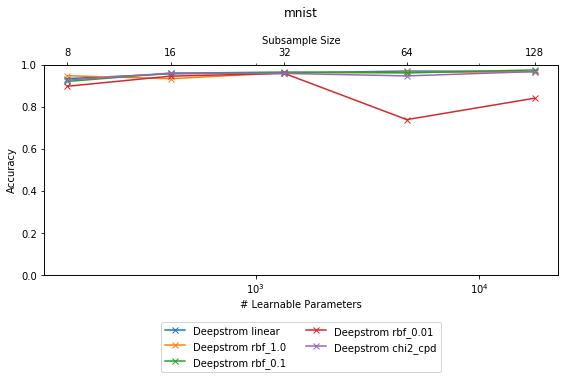

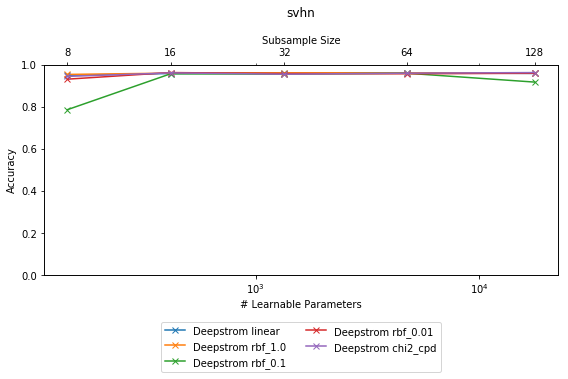

In [23]:
for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        if k_name == "rbf":
            for g_val in gamma_values:
                k_name = "rbf" + "_" + str(g_val)
                df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
                accuracies_kernel = df_rbf["test_acc"]
                subsample_sizes_kernel = df_rbf["--nys-size"].astype(int)
                np_param = (np.square(subsample_sizes_kernel) +  # m x m
                            subsample_sizes_kernel * nb_classes_dataset)  # m x c
                sorted_idx = np.argsort(np_param.values)
                xx = np_param.values[sorted_idx]
                print(accuracies_kernel.values[sorted_idx])
                yy = accuracies_kernel.values[sorted_idx].astype(float)
                ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
        else:
            accuracies_kernel = df_kernel["test_acc"]
            subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            print(accuracies_kernel.values[sorted_idx])
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")


    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)